<html>
    <h1> Supervised_Learning_Logistic_Regression_Binary
        </h1>
        <p> <b> Min Khant Soe</b> </p>
        <p> ID: 122277 </p>
        <p> ^_^ </p>
    </html>

<html>
    <p> 1. Put everything into a class called LogisticRegression. The training method should be "minibatch" </p>
    </html>

In [75]:
class LogisticRegression:
    def __init__(self, method, X, y, max_iter=1000, l_rate = 0.01, p_loss = 10000, tol = 0.0001):
        self.method = method
        self.X = X
        self.y = y
        self.max_iter = max_iter
        self.l_rate = l_rate
        self.loss = []
        self.p_loss = p_loss
        self.tol = tol
        
        if method == 'minibatch':
            self.w = np.zeros(self.X.shape[1])
        
        #10% of data
            batch_size = int(0.1 * self.X.shape[0])
            for i in range(self.max_iter):
                
                ix = np.random.randint(0, self.X.shape[0]) #<----with replacement
                batch_X = self.X[ix:ix+batch_size]
                batch_y = self.y[ix:ix+batch_size]

                cost, grad = self.gradient(batch_X, batch_y)

                if i % 500 == 0:
                    print(f"Cost at iteration {i}", cost)
                self.w = self.w - self.l_rate * grad
                self.loss.append(cost)
                
                c_loss = cost
                difference = np.abs(c_loss - self.p_loss)
                if difference < self.tol:
                    print("Stop the loop")
                    break
                self.p_loss = c_loss
    
    def gradient(self, X, y):
        m = X.shape[0]
        h = self.h_theta(X)
        error = h - y
        # putting negative sign for negative log likelihood
        cost = - np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        grad = np.dot(X.T, error)
        return cost, grad

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
        
    def h_theta(self, X):
        return self.sigmoid(X @ self.w)

    def output(self, pred):
        return np.round(pred)
   
    def plot(self):
        plt.plot(np.arange(len(self.loss)), self.loss, color = 'Green')
        plt.title('The plot of training losses as number of iters increases.')
  
        

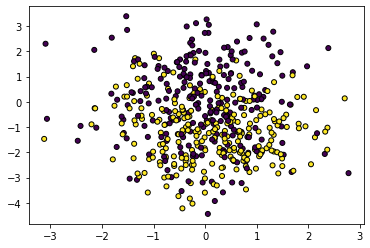

In [76]:
import numpy as np
import matplotlib.pyplot as plt

#Get X and y in the right shape
from sklearn import linear_model
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = make_classification(n_samples=500, n_features=10, n_redundant=2, n_informative=4,
                             n_clusters_per_class=2, random_state=14)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

# feature scaling helps reaching convergence faster ______________________________
scaler = StandardScaler()
X = scaler.fit_transform(X)

#Train_test_split_________________________________________________________________
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#Add Intercept____________________________________________________________________
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)  # add intercept
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)  # add intercept

In [91]:
model = LogisticRegression('minibatch', X_train, y_train, 10000, 0.001, 10000, 0.0001)

Cost at iteration 0 24.26015131959808
Cost at iteration 500 12.371655040667004
Cost at iteration 1000 14.184782964957638
Cost at iteration 1500 16.935464955786927
Stop the loop


<html>
    <p> 2. Perform a classification on the data given above. </p>
    </html>

In [92]:
yhat = model.output(model.h_theta(X_test))
print(yhat)

[0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1.
 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0.
 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1.
 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1.
 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 1. 1.]


In [93]:
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
print("=========Classification report=======")
print(classification_report(y_test, yhat))
print("=========Average precision score=======")
print(average_precision_score(y_test, yhat))

=========Classification report=======
              precision    recall  f1-score   support

           0       0.83      0.82      0.82        76
           1       0.81      0.82      0.82        74

    accuracy                           0.82       150
   macro avg       0.82      0.82      0.82       150
weighted avg       0.82      0.82      0.82       150

=========Average precision score=======
0.7571171171171172


<html>
    <p> 3. Plot training losses as number of iters increases. </p>
    </html>

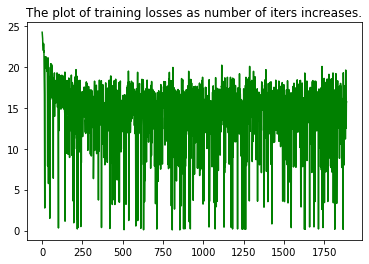

In [94]:
model.plot()

<html>
    <p> 4. Writing a class called classification_report containing 4 functions (Accuracy, Recall, Precision, F1) and use it to evaluate your model. </p>
    </html>

In [95]:
print(y_train.shape, y_test.shape,yhat.shape)

(350,) (150,) (150,)


In [96]:
TP = sum((y_test == 1) & (yhat == 1))
print(TP)

61


In [97]:
class classification_report:
    def __init__(self, actual, predicted):
        self.actual = actual
        self.predicted = predicted
        self.TP = sum((self.actual == 1) & (self.predicted == 1))
        self.TN = sum((self.actual == 0) & (self.predicted == 0))
        self.FP = sum((self.actual == 0) & (self.predicted == 1))
        self.FN = sum((self.actual == 1) & (self.predicted == 0))
    def accuracy(self):
        self.Accuracy = (self.TP + self.TN)/(self.TP + self.TN + self.FP + self.FP)
        return self.Accuracy
    def recall(self):
        self.Recall = (self.TP)/(self.TP + self.FN)
        return self.Recall
    def precision(self):
        self.Precision = (self.TP)/(self.TP + self.FP)
        return self.Precision
    def f1(self):
        self.F1 = 2*(self.Precision * self.Recall)/(self.Precision + self.Recall)
        return self.F1

In [98]:
check = classification_report(y_test, yhat)
print("=========Classification report=======")
print(f" Accuracy: {check.accuracy()}\n Recall: {check.recall()} \n Precision: {check.precision()} \n F1: {check.f1()}")

=========Classification report=======
 Accuracy: 0.8145695364238411
 Recall: 0.8243243243243243 
 Precision: 0.8133333333333334 
 F1: 0.8187919463087249
